In [1]:
# HIDE CODE
import deps
from importlib import reload
reload(deps)

alldat, dat_LFP, dat_ST = deps.get_data()
dat = alldat[28]
sp, neu, trial_starts = deps.convert_raster_to_spiketimes(dat)
events_df = deps.convert_events_to_dataframe(dat, trial_starts,
                                        event_names=('gocue', 'response_time','feedback_time'),
                                        condition_names=('response','contrast_right','contrast_left','feedback_type'))

spykes_times = deps.spykes_get_times(sp, neu)


======= time_gocue / response =======


The condensed distance matrix must contain only finite values.
======= time_gocue / contrast_right =======


The condensed distance matrix must contain only finite values.
======= time_gocue / contrast_left =======


The condensed distance matrix must contain only finite values.
======= time_gocue / feedback_type =======


The condensed distance matrix must contain only finite values.
======= time_response / response =======


The condensed distance matrix must contain only finite values.
======= time_response / contrast_right =======


The condensed distance matrix must contain only finite values.
======= time_response / contrast_left =======


The condensed distance matrix must contain only finite values.
======= time_response / feedback_type =======


The condensed distance matrix must contain only finite values.
======= time_feedback / response =======


The condensed distance matrix must contain only finite values.
======= time_feedback / contrast_right =======


The condensed distance matrix must contain only finite values.
======= time_feedback / contrast_left =======


The condensed distance matrix must contain only finite values.
======= time_feedback / feedback_type =======


The condensed distance matrix must contain only finite values.


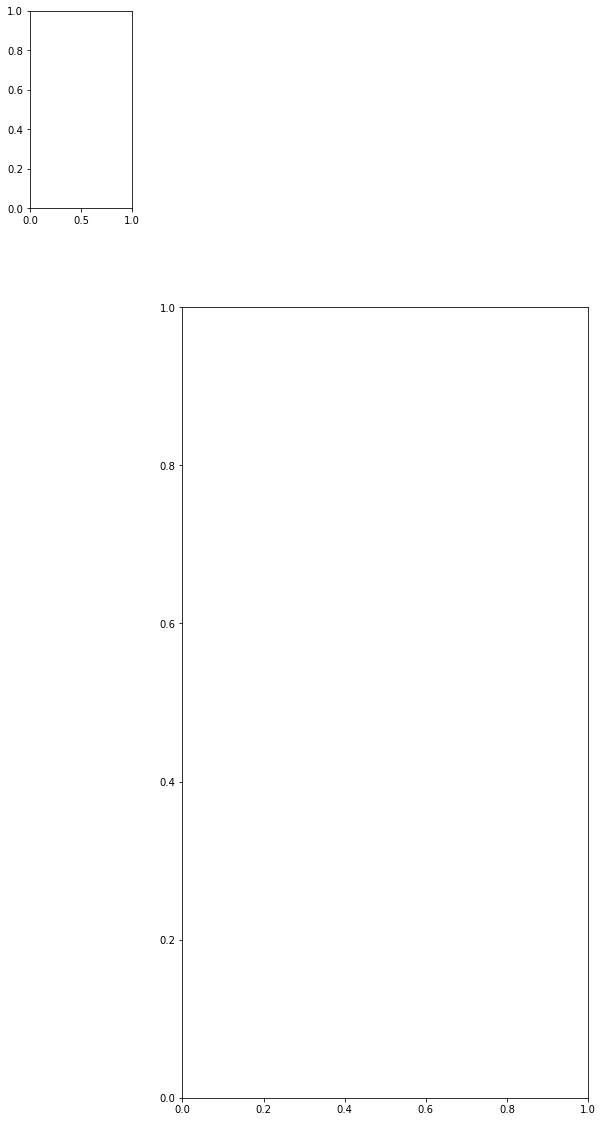

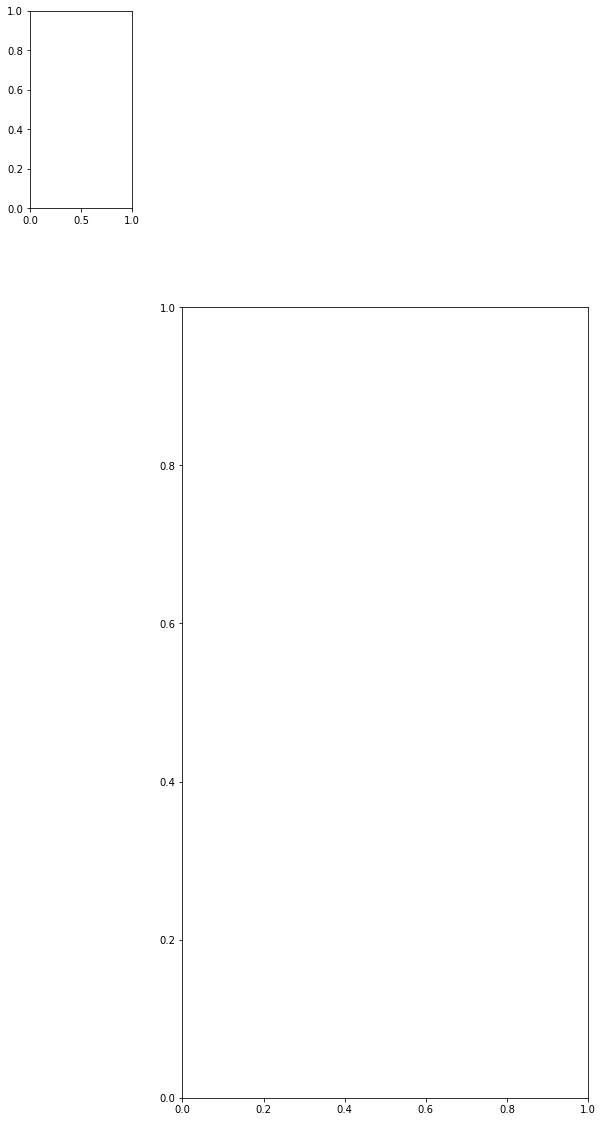

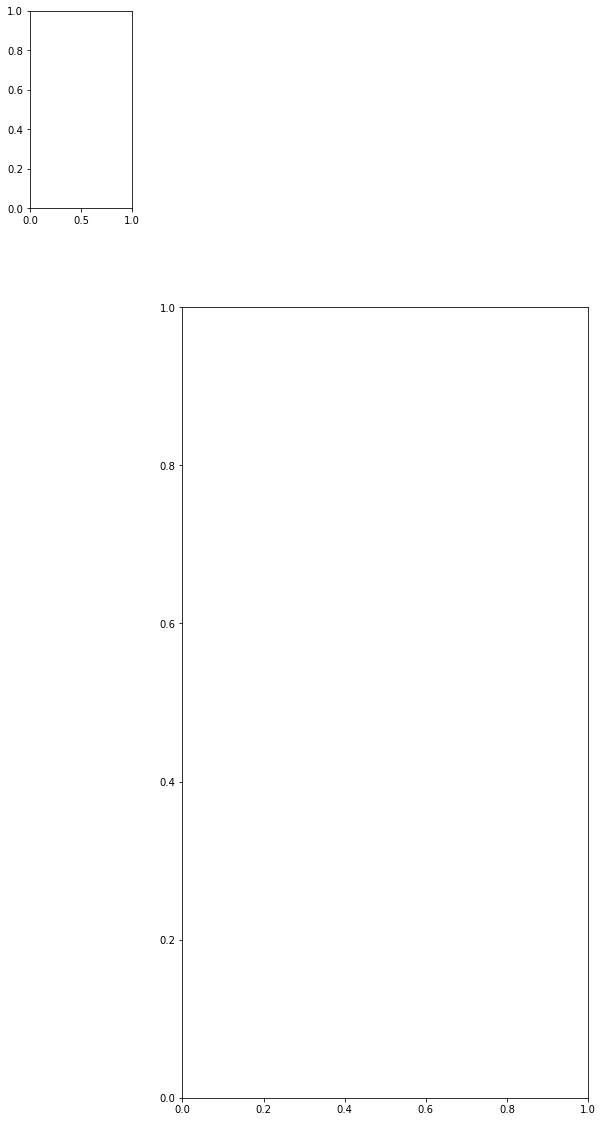

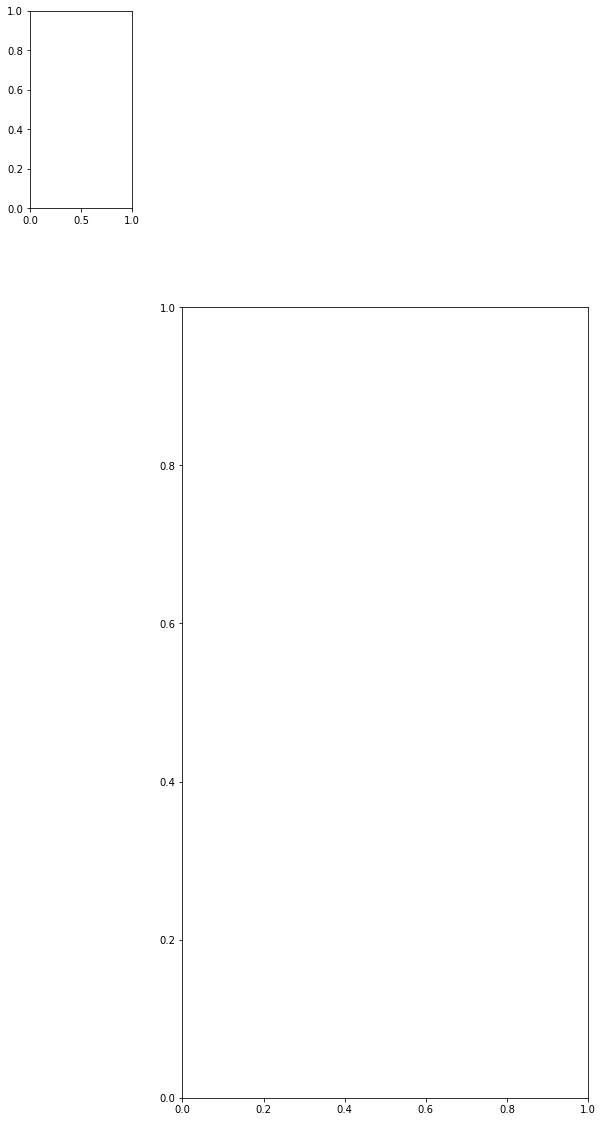

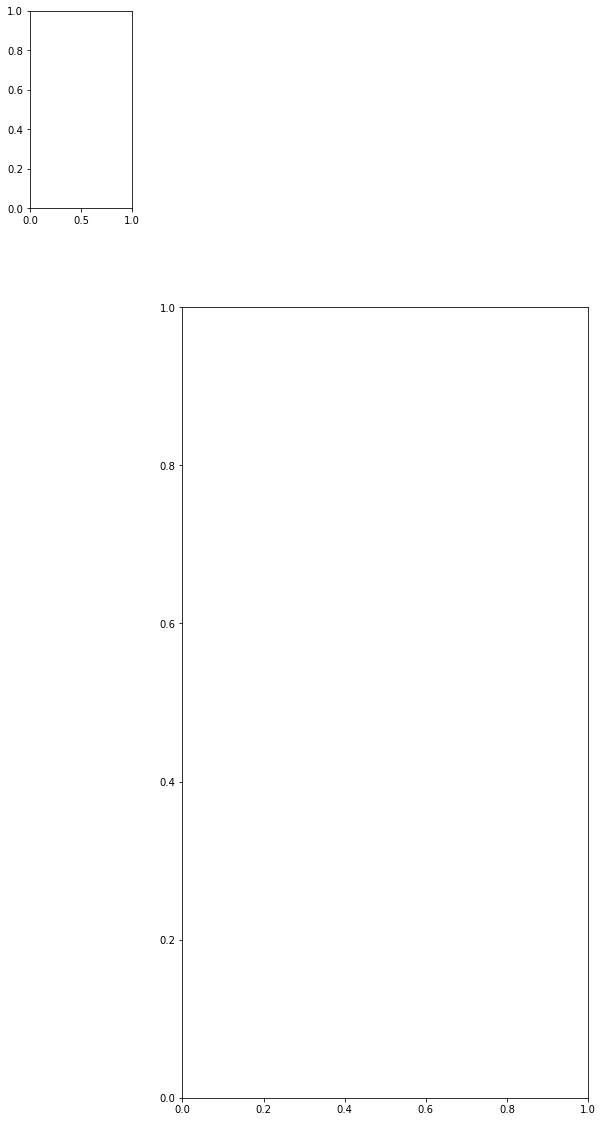

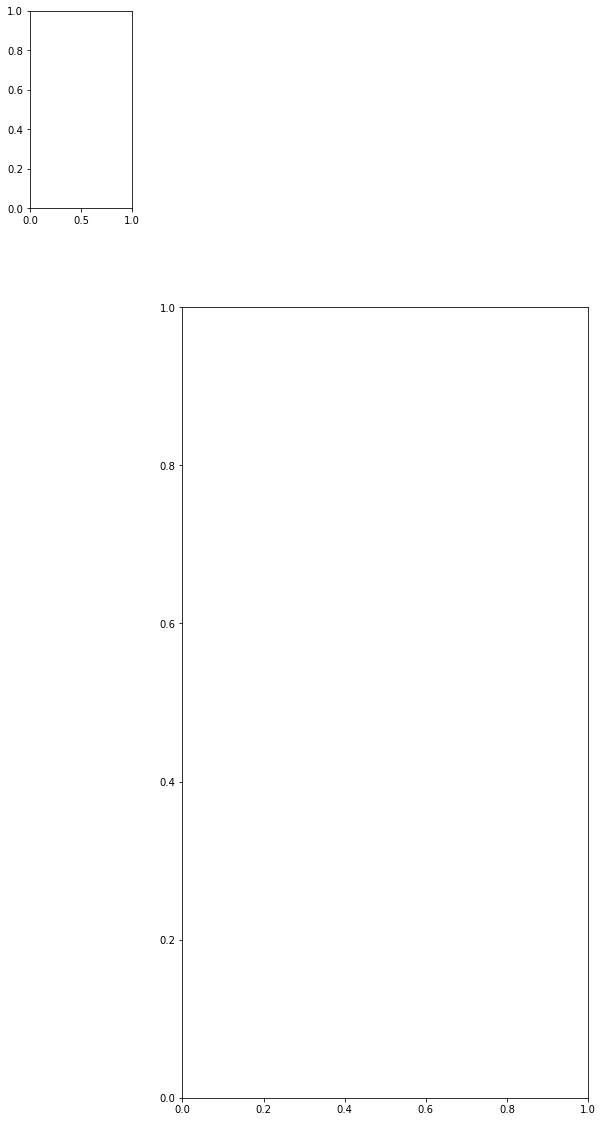

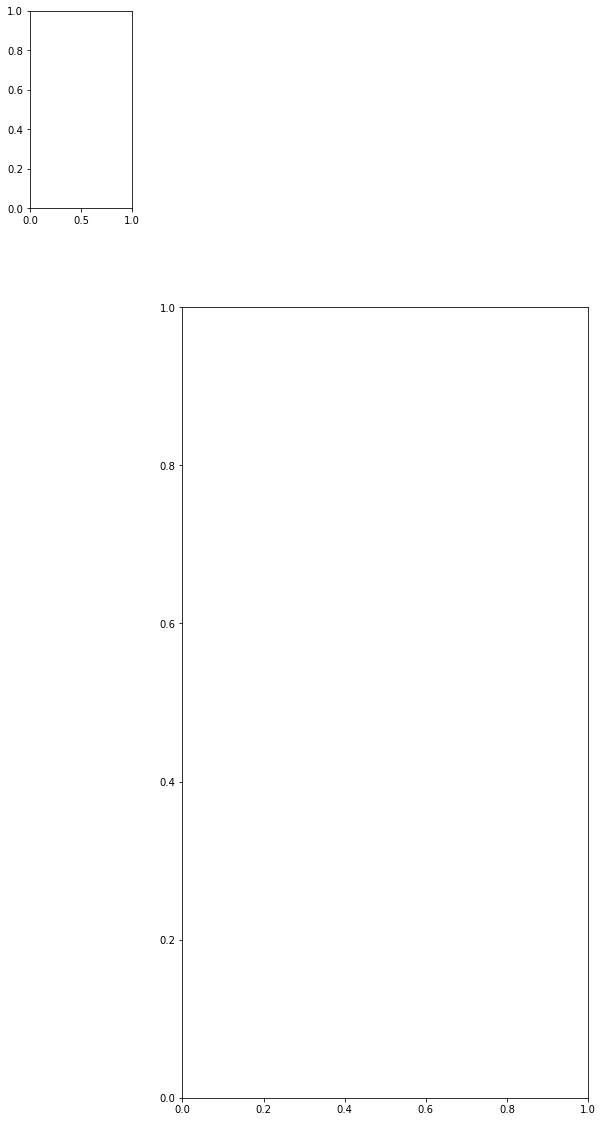

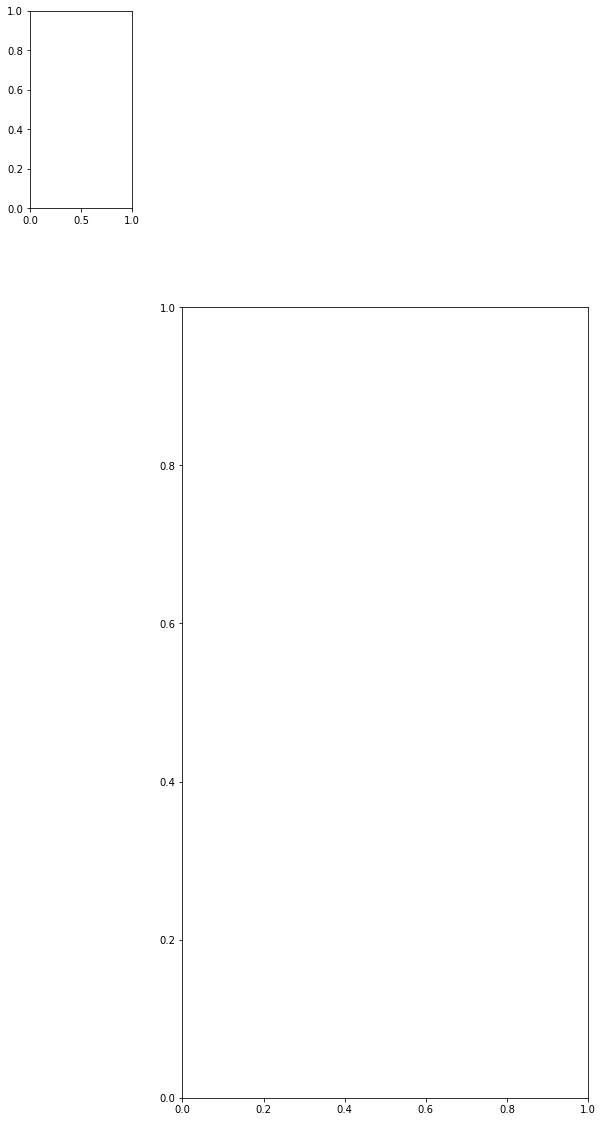

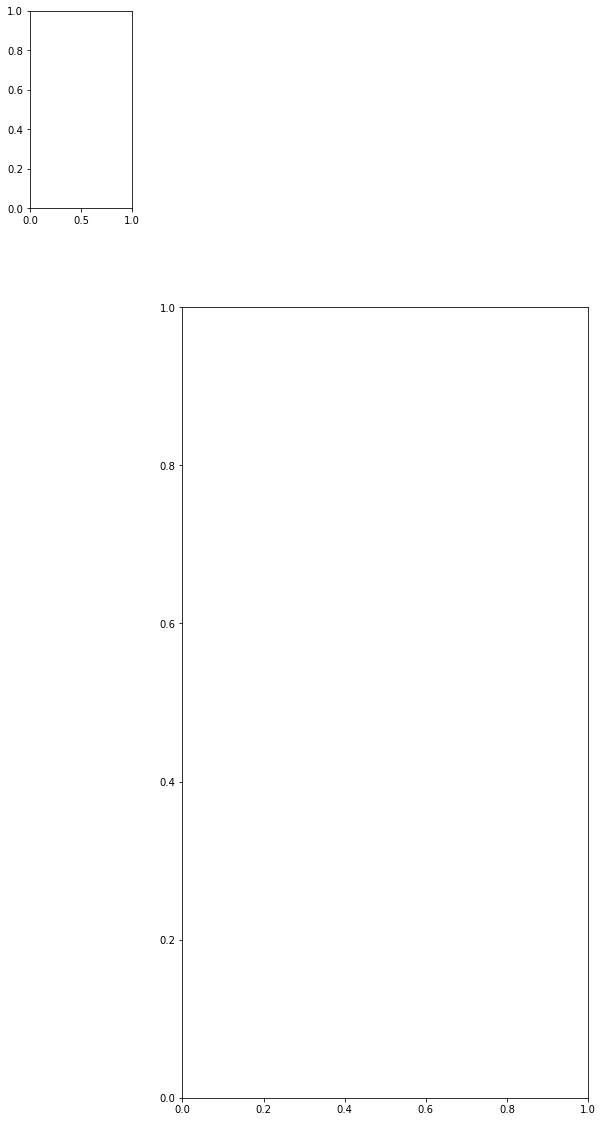

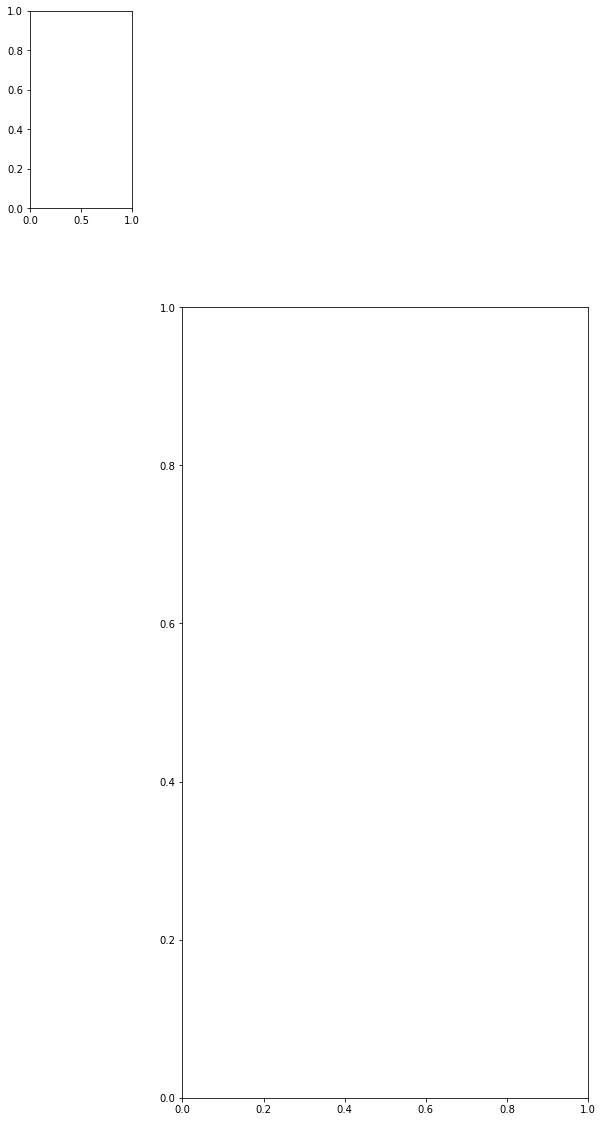

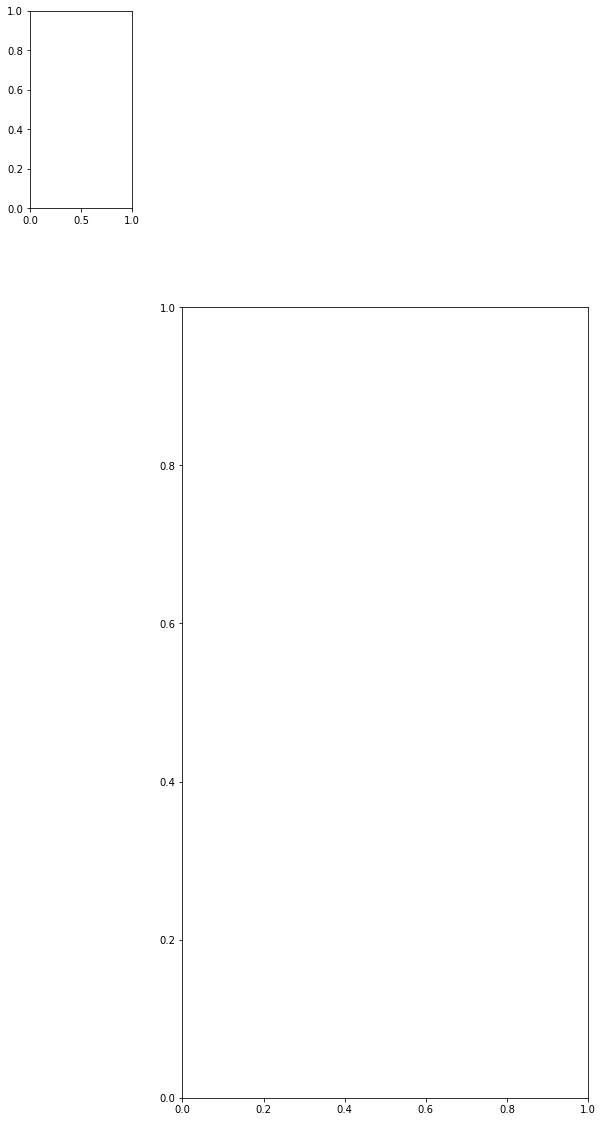

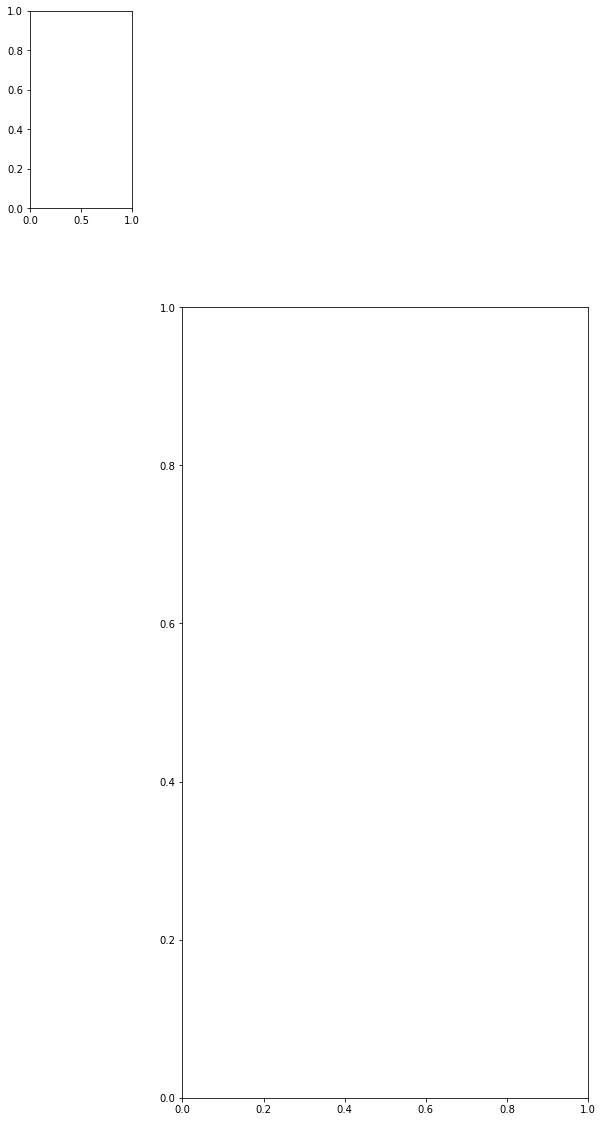

In [2]:
# HIDE CODE
# Hvplot
from bokeh.plotting import show
import holoviews as hv
import hvplot.pandas  # noqa
%output size=320

#!pip install -U hvplot
for event_name in events_df.columns[events_df.columns.str.contains('time')]:
    for condition_name in events_df.columns[~events_df.columns.str.contains('time')]:
        print(f"======= {event_name} / {condition_name} =======")
        _, all_psth = deps.get_psth(spikes=spykes_times,
                               spykes_df=events_df,
                               event=event_name, 
                               conditions=condition_name,
                               window=[-500, 1500], 
                               bin_size=10,
                               )
        # Make psth
        xar=deps.spyke2xar(all_psth)

        # Cluster
        df,df_tidy,index=deps.cluster(xar,plotose=True)